# Project Requirements
- Final dataset should include 3 changes (deleting, inserting, adding, etc.)
- Pandas, matplot, and scikit packages should be part of the solution.
- Able to display results based on scenarios (For example, if I have different output, how the result will change. It could be a graph or display of results in row format)
- Minimum of 5 charts for insights. Use Python libraries to draw graphs.
- Total ten insights from the dataset 

### The Final Report should include the following.
- Description of project 
- Overview of the dataset 
- Exploratory analysis 
- Details of insights will be identified from the dataset. 
- Python programs for all 10 insights
- Minimum of 5 charts 


## 1. Abstract
Airbnb is a prominent rental property service catering to vacationers, winter avoiders, getaway seekers, and travelers worldwide. This project delves into the insights behind Airbnb listings in the United States. We will analyze the top cities with the most rental properties, evaluate the pricing trends across different states, and develop a predictive model for estimating rental prices.

In [2]:
#Import the required packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data using pandas

df = pd.read_csv("airbnb_listings_usa.csv", low_memory=False)



## Overview of Data and Exploratory Data Analysis (EDA)
To begin we need to get a better understanding of the data. We will look at things such as number of rows, columns, descriptive varaiables to help describe the data, and even visualizations to get a better understanding of how the data is formatted in the file. Below is the column names and descriptions from the dataset. To view the dataset plesae see (https://www.kaggle.com/datasets/tamle507/airbnb-listings-usa)

| Column Name                         | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| `id`                                | Unique identifier for the listing                                           |
| `name`                              | Name of the listing                                                         |
| `host_id`                           | Unique identifier for the host                                              |
| `host_name`                         | Name of the host                                                            |
| `neighbourhood_group`               | Broad geographical area of the listing (e.g., borough or city district)     |
| `neighbourhood`                     | Specific neighbourhood where the listing is located                         |
| `latitude`                          | Latitude coordinate of the listing                                          |
| `longitude`                         | Longitude coordinate of the listing                                         |
| `room_type`                         | Type of room offered (e.g., entire home/apt, private room, shared room)     |
| `price`                             | Price per night for the listing (in local currency)                         |
| `minimum_nights`                    | Minimum number of nights required to book the listing                       |
| `number_of_reviews`                 | Total number of reviews the listing has received                            |
| `last_review`                       | Date of the last review received                                            |
| `reviews_per_month`                 | Average number of reviews per month                                         |
| `calculated_host_listings_count`    | Total number of listings the host has                                       |
| `availability_365`                  | Number of days the listing is available for booking in a year               |
| `number_of_reviews_ltm`             | Number of reviews in the last twelve months                                 |
| `license`                           | License information for the listing (if applicable)                         |
| `state`                             | State where the listing is located                                          |
| `city`                              | City where the listing is located                                           |


In [4]:
#head, this will show us the top 5 rows in the dataset. Giving us a good idea of the layout of columns and what they may include

df.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
0,0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,City of Los Angeles,Venice,33.99211,-118.47600,Entire home/apt,...,30,3,2019-02-25,0.02,2,0,0,NaN,CA,Los Angeles
1,1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,...,30,2,2016-05-15,0.01,1,139,0,NaN,CA,Los Angeles
2,2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,...,30,138,2020-12-13,0.98,2,224,0,NaN,CA,Los Angeles
3,3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,...,30,30,2017-12-24,0.22,1,0,0,NaN,CA,Los Angeles
4,4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,City of Los Angeles,Mar Vista,34.00389,-118.44126,Entire home/apt,...,3,378,2022-08-21,2.60,1,348,41,HSR19-001336,CA,Los Angeles


In [5]:
#this command allows us to quickly see all column names in the dataset
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'state',
       'city'],
      dtype='object')

In [6]:
#This will show the shape in (rows, column) order
df.shape

(325858, 21)

In [7]:
#use of dtypes shows the type of data in each column, either int64 or integer/numeric, object/string, or float64 which is decimal value
df.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
state                              object
city                               object
dtype: object

In [8]:
#Describe the numeric columns in the dataframe
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,325858.000000,3.258580e+05,3.258580e+05,325858.000000,325858.000000,325858.000000,325858.000000,325858.000000,263166.00000,325858.000000,325858.000000,325858.000000
mean,162928.500000,1.541106e+17,1.446528e+08,34.676058,-106.354815,284.915304,13.430175,39.457850,1.69220,27.108900,182.361099,11.889817
std,94067.246346,2.736013e+17,1.449951e+08,6.213029,24.176674,835.569711,28.783033,75.724832,2.01294,79.983052,134.095115,20.672830
min,0.000000,1.090000e+02,2.300000e+01,18.920250,-159.714620,0.000000,1.000000,0.000000,0.01000,1.000000,0.000000,0.000000
25%,81464.250000,2.394619e+07,2.311836e+07,32.775202,-118.410259,97.000000,2.000000,1.000000,0.33000,1.000000,55.000000,0.000000
50%,162928.500000,4.511097e+07,9.320864e+07,34.102360,-117.131590,159.000000,3.000000,9.000000,1.01000,2.000000,174.000000,3.000000
75%,244392.750000,5.420558e+07,2.388338e+08,39.948015,-82.549423,275.000000,30.000000,42.000000,2.49000,12.000000,322.000000,16.000000
max,325857.000000,7.251653e+17,4.810023e+08,47.748000,-70.913250,100000.000000,1250.000000,2600.000000,190.48000,660.000000,365.000000,1284.000000


In [9]:
#describe the categorical columns in the dataframe
df.describe(include = 'O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license,state,city
count,325839,324714,155047,325146,325858,263166,86635,325858,325858
unique,264019,33120,34,1575,4,2965,48064,19,31
top,Boutique Hostel,Blueground,City of Los Angeles,Unincorporated Areas,Entire home/apt,2022-09-05,Exempt,CA,Los Angeles
freq,152,4876,39002,13400,243098,13190,6603,127329,91630


# Cleaning
Now that we have a general understanding of the layout of the dataset, we can dive deeper into the data. This will consist of handling missing values, duplicates, drop columns, add columns, visualizations. 

In [10]:
#View missing values and duplicates
df.isna().sum()

Unnamed: 0                             0
id                                     0
name                                  19
host_id                                0
host_name                           1144
neighbourhood_group               170811
neighbourhood                        712
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        62692
reviews_per_month                  62692
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           239223
state                                  0
city                                   0
dtype: int64

In [11]:
#delete unneeded columns and missing values
df = df.drop(['Unnamed: 0','id','host_id','license', 'neighbourhood_group'], axis = 1)
df.isna().sum()

name                                 19
host_name                          1144
neighbourhood                       712
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       62692
reviews_per_month                 62692
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
state                                 0
city                                  0
dtype: int64

In [12]:
#drop rows where missing values in name, host_name, last review, reviews_last_month, neighbourhood as these are probalby no longer active airbnb

df.dropna(subset=['name','host_name','last_review','reviews_per_month', 'neighbourhood'], inplace = True)

df.isna().sum()



name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
state                             0
city                              0
dtype: int64

In [13]:
df.shape

(262040, 16)

## Findings

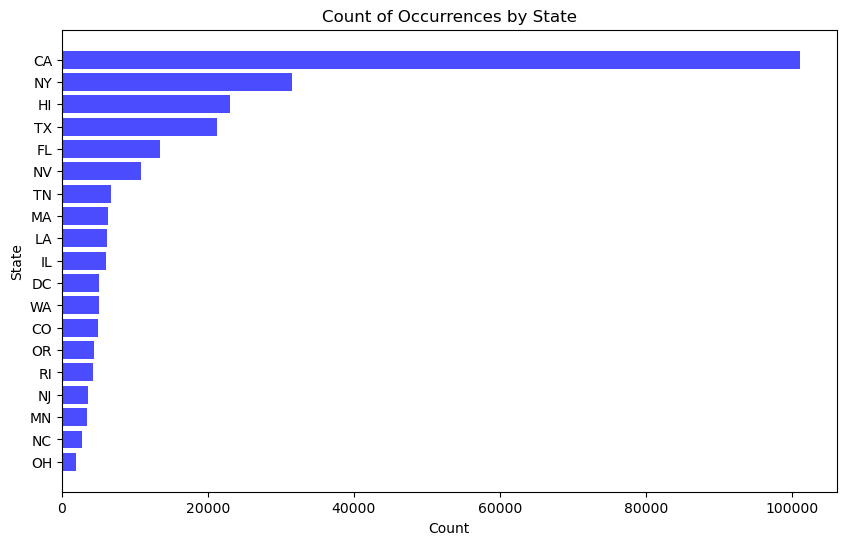

In [14]:
#figure showing distribution by state
state_counts = df.groupby('state').size().reset_index(name='count').sort_values('count')

plt.figure(figsize=(10, 6))
plt.barh(state_counts['state'], state_counts['count'], color='blue', alpha=0.7)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Count of Occurrences by State')
plt.show()


As you can see from the graphs above, majority of the listing on Airbnb in this dataset are located in California. The top 5 states with listings are California, New York, Hawaii, and Texas. California outnumbers all other states by almost 3 times. 

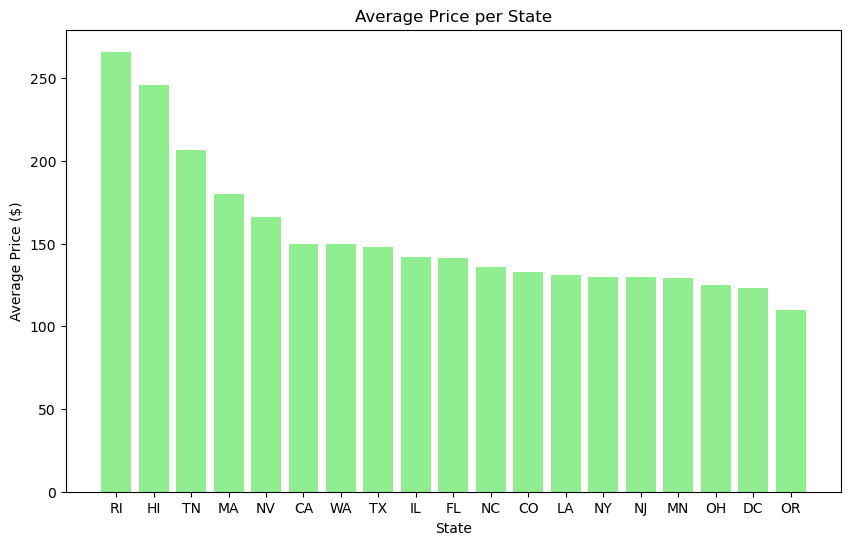

In [15]:
state = df.groupby('state')['price'].agg(['count','mean', 'median', 'max', 'min']).sort_values(by=['count','mean','median'], ascending = [False,False,False])
state = state.sort_values('median', ascending = False)

# #plot average price per state
plt.figure(figsize = (10,6))
plt.bar(state.index,state['median'],color = 'lightgreen')
plt.title('Average Price per State')
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.show()

From the following you can see Rhode Island has the highest median price of listings. Following Rhode Island, the top 5 rounds out with Hawaii , Tennessee, Massachusents, and Nevada. As a potential investor considering Texas, you can see that the median price is on the lower side, and the state is top 5 in listings. I would consider this a good investment area because Texas is vast and large with many major areas, spreading out the competition. However we want to get a better understanding of what city is best to inveset into.

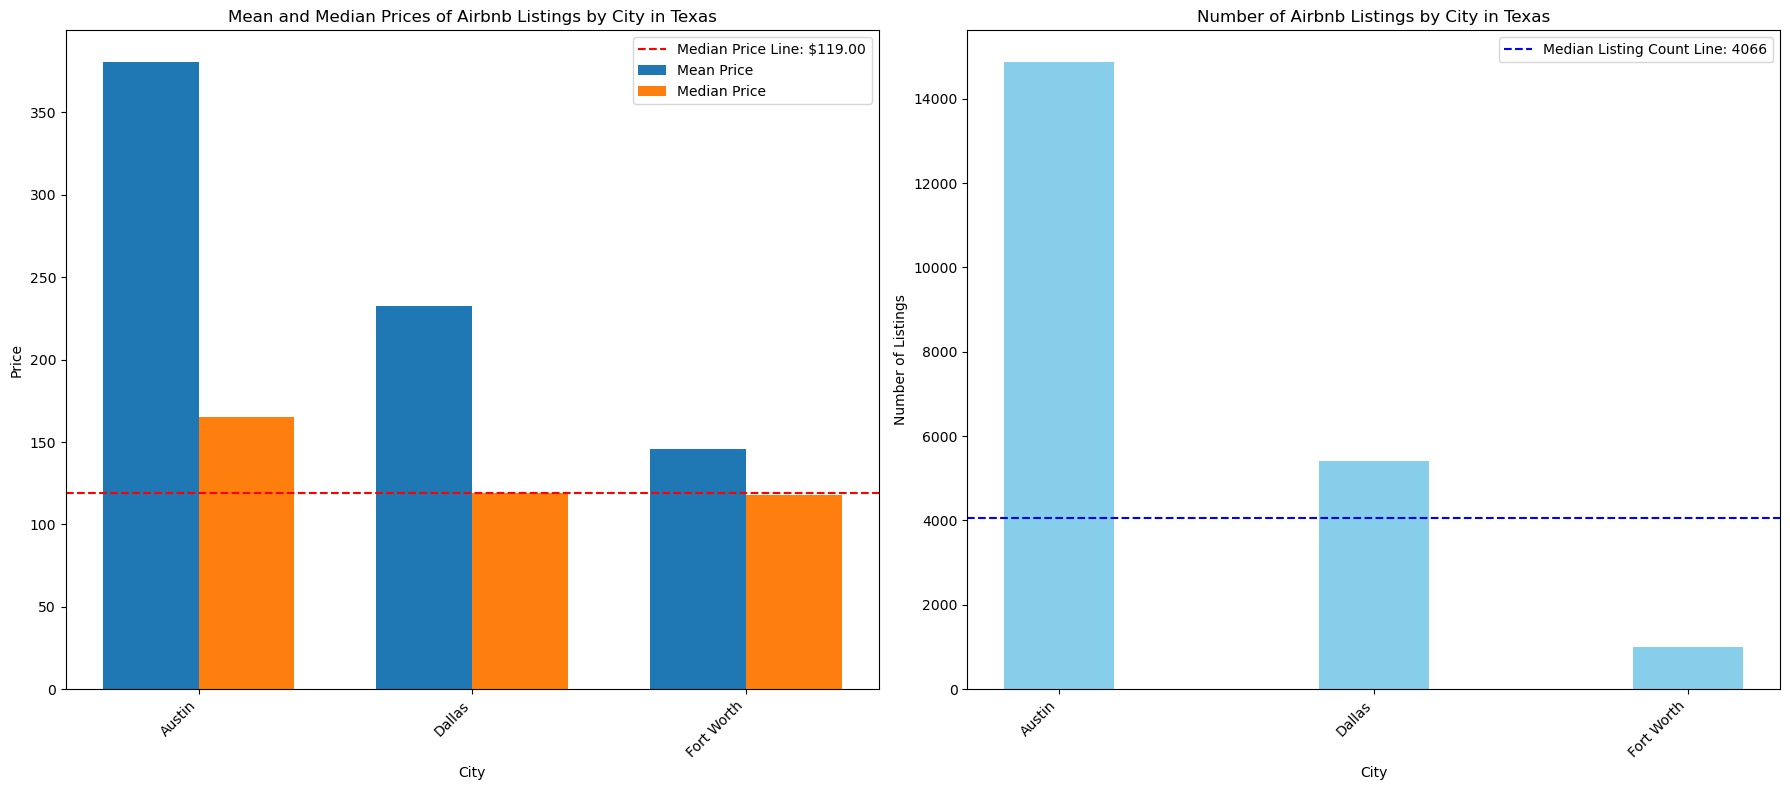

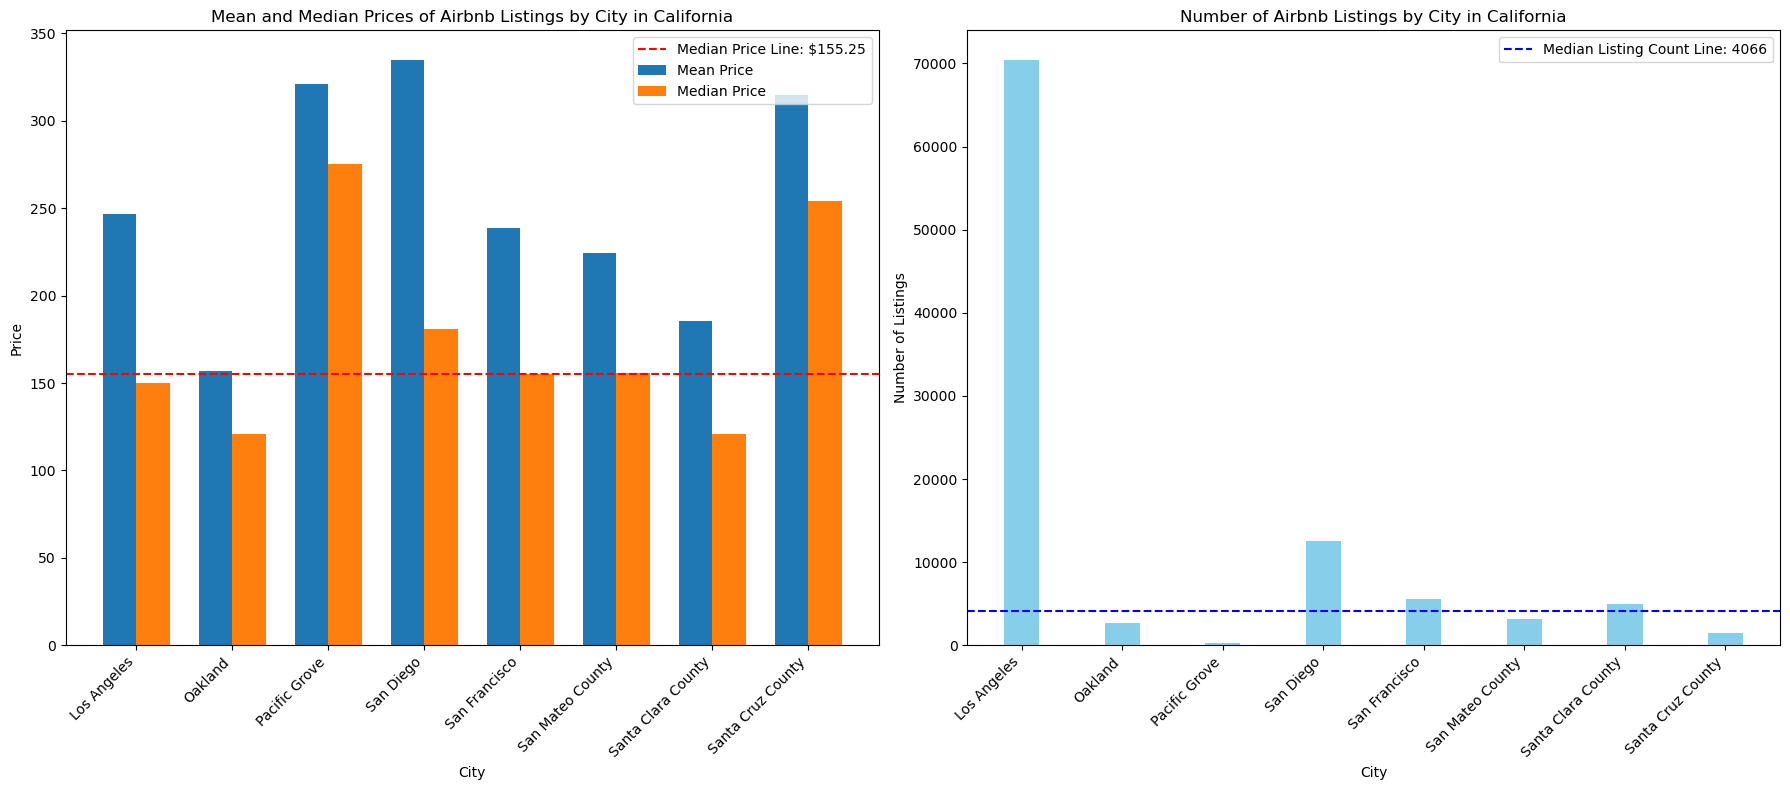

In [28]:
# Group by city and calculate mean, median, and count of prices
texas_cities = texas.groupby('city')['price'].agg(['mean', 'median', 'count']).reset_index()

# Define the positions for the bars
x = np.arange(len(texas_cities['city']))
width = 0.35

# Create the plots
plt.figure(figsize=(18, 8))

# Plot mean and median prices
plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, texas_cities['mean'], width, label='Mean Price')
bars2 = plt.bar(x + width/2, texas_cities['median'], width, label='Median Price')

# Highlight the median price with a horizontal line
median_price_value = texas_cities['median'].median()
plt.axhline(median_price_value, color='red', linestyle='--', label=f'Median Price Line: ${median_price_value:.2f}')

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings by City in Texas')
plt.xticks(ticks=x, labels=texas_cities['city'], rotation=45, ha='right')
plt.legend()

# Plot count of listings
plt.subplot(1, 2, 2)
plt.bar(x, texas_cities['count'], width, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings by City in Texas')
plt.xticks(ticks=x, labels=texas_cities['city'], rotation=45, ha='right')

# Add a horizontal line for the median number of listings
plt.axhline(median_listing_count, color='blue', linestyle='--', label=f'Median Listing Count Line: {median_listing_count:.0f}')
plt.legend()

plt.tight_layout()
plt.show()



# Group by city and calculate mean, median, and count of prices
california_cities = california.groupby('city')['price'].agg(['mean', 'median', 'count']).reset_index()

# Define the positions for the bars
x = np.arange(len(california_cities['city']))
width = 0.35

# Create the plots
plt.figure(figsize=(18, 8))

# Plot mean and median prices
plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, california_cities['mean'], width, label='Mean Price')
bars2 = plt.bar(x + width/2, california_cities['median'], width, label='Median Price')

# Highlight the median price with a horizontal line
median_price_value = california_cities['median'].median()
plt.axhline(median_price_value, color='red', linestyle='--', label=f'Median Price Line: ${median_price_value:.2f}')

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings by City in California')
plt.xticks(ticks=x, labels=california_cities['city'], rotation=45, ha='right')
plt.legend()

# Plot count of listings
plt.subplot(1, 2, 2)
plt.bar(x, california_cities['count'], width, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings by City in California')
plt.xticks(ticks=x, labels=california_cities['city'], rotation=45, ha='right')

# Add a horizontal line for the median number of listings
plt.axhline(median_listing_count, color='blue', linestyle='--', label=f'Median Listing Count Line: {median_listing_count:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

### Findings on the Most Popular Airbnb Properties in Texas

Based on our analysis of the Airbnb dataset, we created a popularity score for properties in Texas by considering the number of reviews, reviews per month, and availability. This score was calculated as follows:

popularity_score = number_of_reviews + (reviews_per_month * 30) - (availability_365 / 10)

After sorting the properties by their popularity scores, we identified the top 10 most popular Airbnb properties in Texas. Here are the key findings:

1. **Top Properties**: The most popular properties are located in various cities across Texas, highlighting the widespread interest in Airbnb accommodations throughout the state.
2. **High Review Count**: These properties have a high number of reviews, indicating that they are frequently booked and reviewed by guests.
3. **Active Engagement**: Properties with higher reviews per month are consistently attracting guests, suggesting active engagement and positive experiences that encourage reviews.
4. **Low Availability**: Many of the top properties have lower availability throughout the year, implying they are frequently booked and in high demand.


This analysis provides valuable insights into the factors contributing to the popularity of Airbnb properties. Hosts and property managers can leverage this information to enhance their listings, improve guest experiences, and increase bookings by focusing on generating positive reviews and maintaining high occupancy rates.

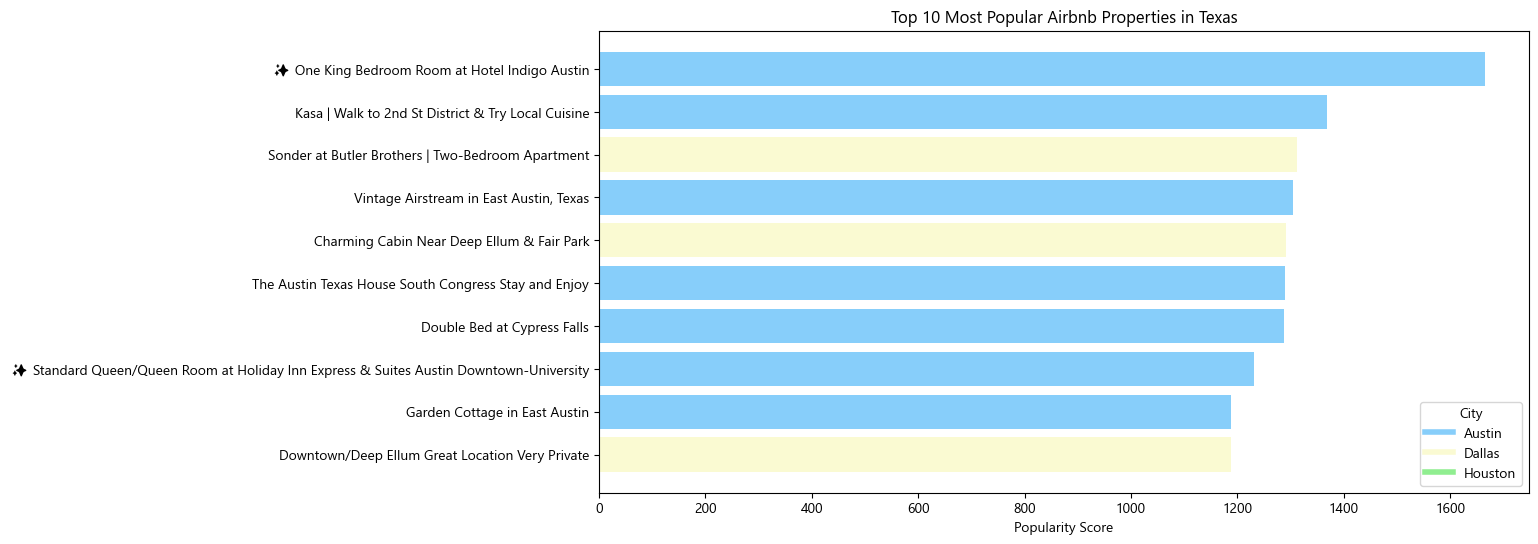

In [79]:
# Ensure we are working with a fresh copy
texas = df[df['state'] == 'TX'].copy()

# Create a popularity score using .loc
texas.loc[:, 'popularity_score'] = texas['number_of_reviews'] + (texas['reviews_per_month'] * 30) - (texas['availability_365'] / 10)

# Sort properties by popularity score
most_popular_properties_texas = texas.sort_values(by='popularity_score', ascending=False).reset_index()

# Select the top 10 most popular properties
top_10_most_popular_texas = most_popular_properties_texas.head(10)

# Define colors for different cities in Texas
city_colors_texas = {
    'Austin': 'lightskyblue',
    'Dallas': 'lightgoldenrodyellow',
    'Houston': 'lightgreen',
    # Add more cities if needed
}

# Plot the top 10 most popular properties in Texas
plt.figure(figsize=(12, 6))
colors_texas = top_10_most_popular_texas['city'].map(city_colors_texas).fillna('grey')  # Handle missing colors
bars_texas = plt.barh(top_10_most_popular_texas['name'], top_10_most_popular_texas['popularity_score'], color=colors_texas)

# Create a legend
handles_texas = [plt.Line2D([0], [0], color=color, lw=4) for color in city_colors_texas.values()]
labels_texas = city_colors_texas.keys()
plt.legend(handles_texas, labels_texas, title='City', loc='best')

plt.xlabel('Popularity Score')
plt.title('Top 10 Most Popular Airbnb Properties in Texas')
plt.gca().invert_yaxis()
plt.show()

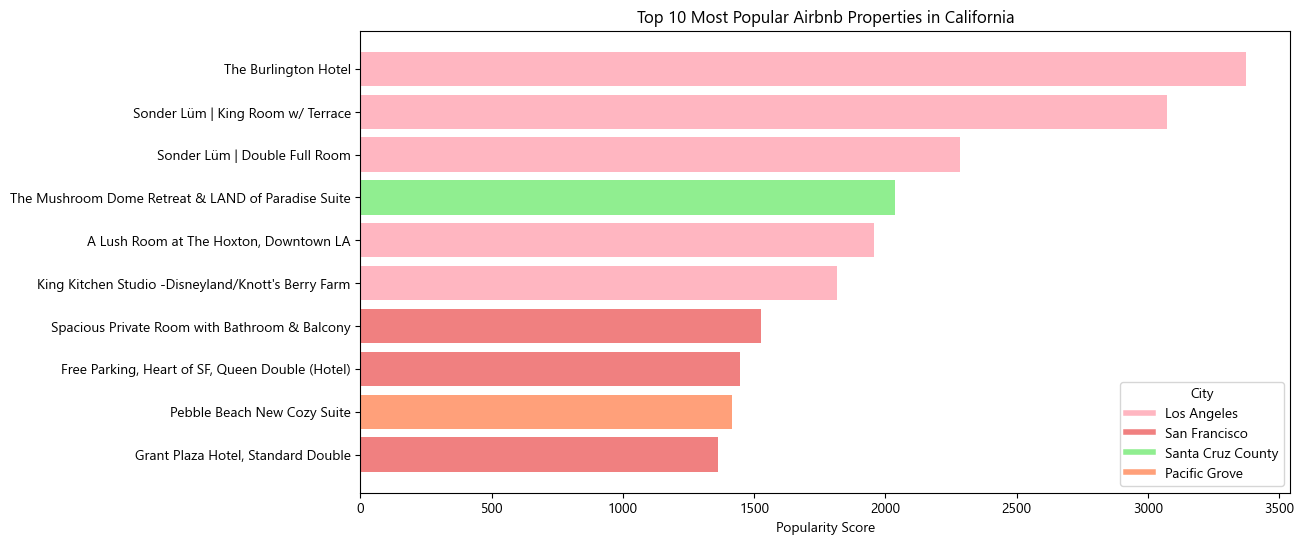

In [80]:
# Ensure we are working with a fresh copy
california = df[df['state'] == 'CA'].copy()

# Create a popularity score using .loc
california.loc[:, 'popularity_score'] = california['number_of_reviews'] + (california['reviews_per_month'] * 30) - (california['availability_365'] / 10)

# Sort properties by popularity score
most_popular_properties_california = california.sort_values(by='popularity_score', ascending=False).reset_index()

# Select the top 10 most popular properties
top_10_most_popular_california = most_popular_properties_california.head(15)

# Define colors for different cities in California
city_colors_california = {
    'Los Angeles': 'lightpink',
    'San Francisco': 'lightcoral',
    'Santa Cruz County': 'lightgreen',
    'Pacific Grove': 'lightsalmon',
    # Add more cities if needed
}

# Plot the top 10 most popular properties in California
plt.figure(figsize=(12, 6))
colors_california = top_10_most_popular_california['city'].map(city_colors_california).fillna('grey')  # Handle missing colors
bars_california = plt.barh(top_10_most_popular_california['name'], top_10_most_popular_california['popularity_score'], color=colors_california)

# Create a legend
handles_california = [plt.Line2D([0], [0], color=color, lw=4) for color in city_colors_california.values()]
labels_california = city_colors_california.keys()
plt.legend(handles_california, labels_california, title='City', loc='best')

plt.xlabel('Popularity Score')
plt.title('Top 10 Most Popular Airbnb Properties in California')
plt.gca().invert_yaxis()
plt.show()

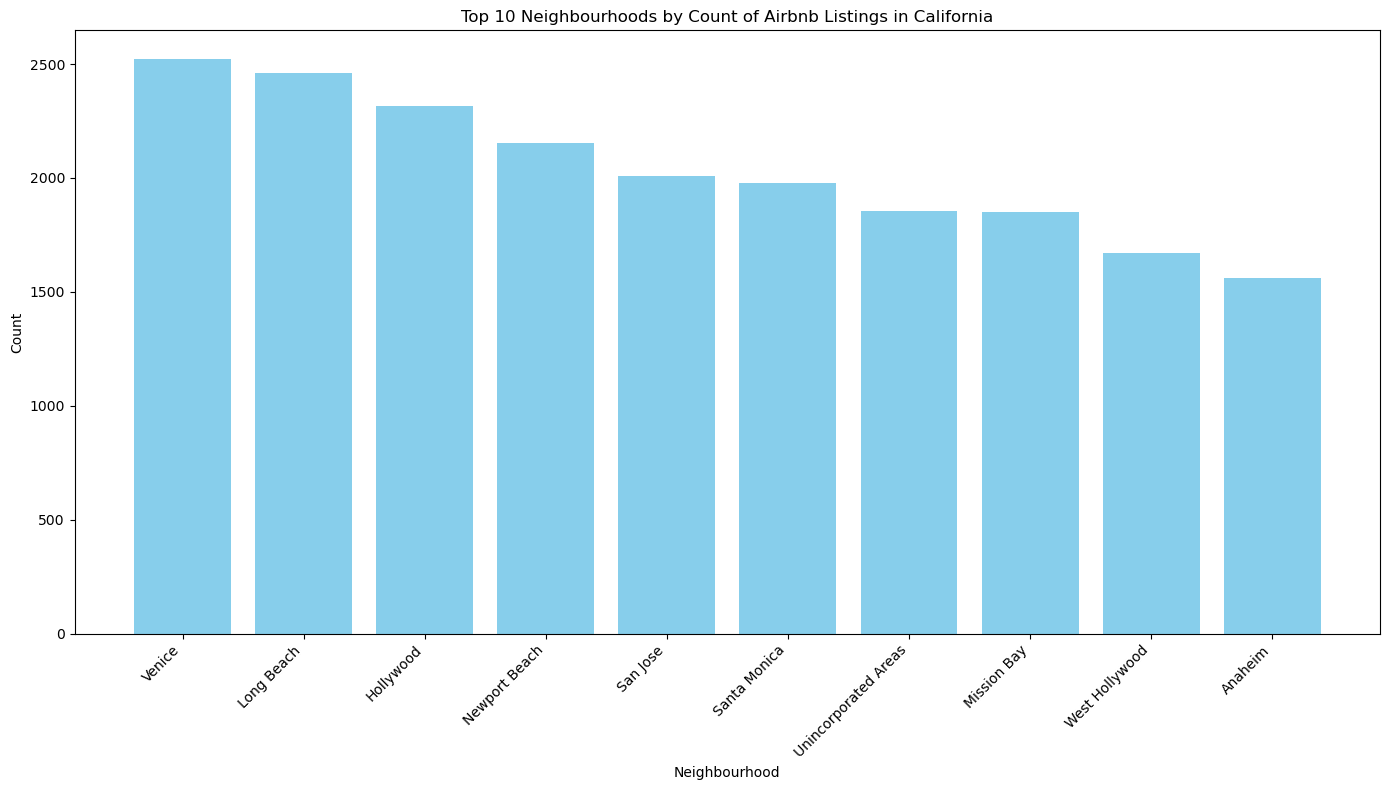

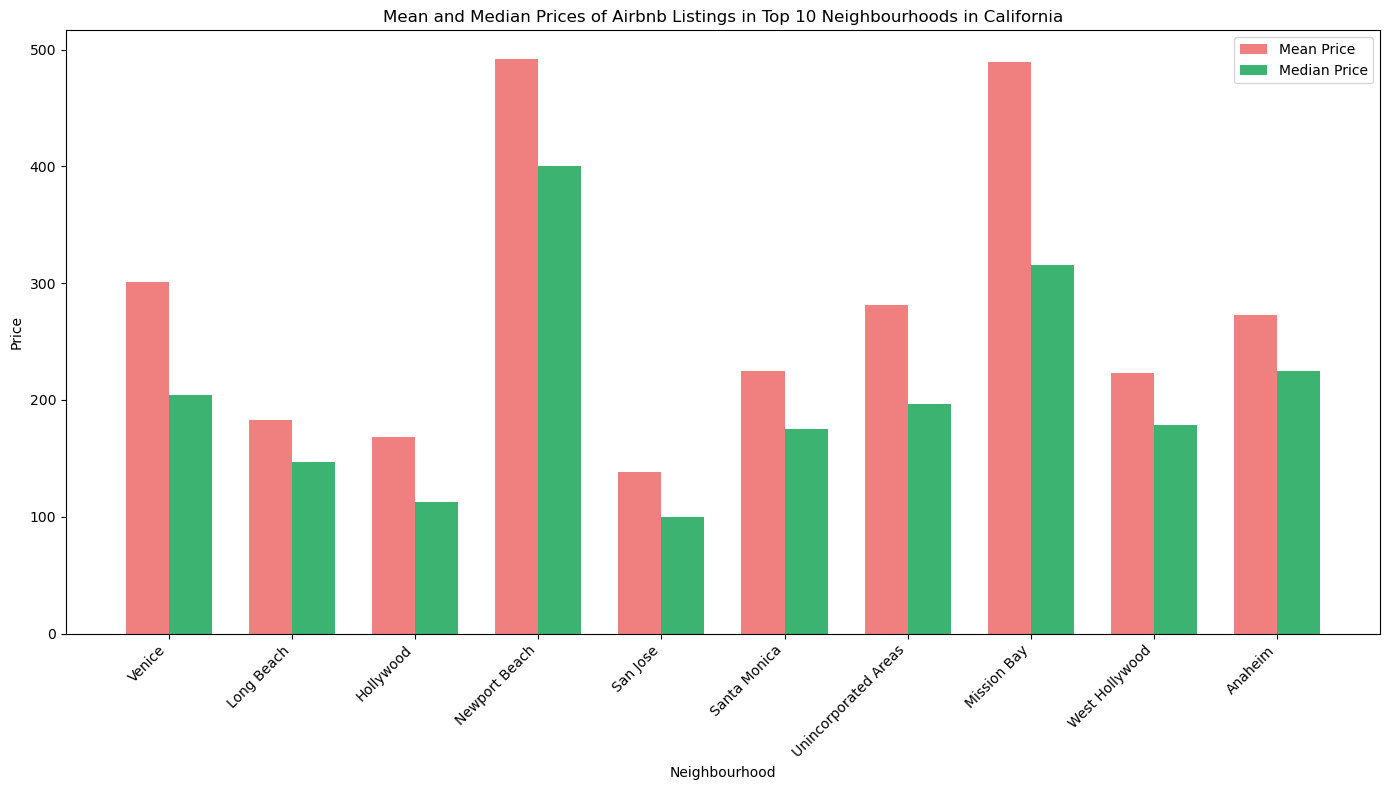

In [22]:
# Calculate the count of listings per neighborhood
neighbourhood_counts = california['neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood', 'count']

# Select the top 10 neighborhoods by count
top_10_neighbourhoods = neighbourhood_counts.head(10)

# Filter the original DataFrame to include only the top 10 neighborhoods
top_10_data = california[california['neighbourhood'].isin(top_10_neighbourhoods['neighbourhood'])]

# Group by neighborhood and calculate mean and median prices
top_10_prices = top_10_data.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()

# Sort the mean and median prices DataFrame to match the order of the top 10 neighborhoods by count
top_10_prices = top_10_prices.set_index('neighbourhood').loc[top_10_neighbourhoods['neighbourhood']].reset_index()

# Create the first plot for the top 10 neighborhoods by count
plt.figure(figsize=(14, 8))
plt.bar(top_10_neighbourhoods['neighbourhood'], top_10_neighbourhoods['count'], color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods by Count of Airbnb Listings in California')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create the second plot for the mean and median prices of the top 10 neighborhoods
x = np.arange(len(top_10_prices['neighbourhood']))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, top_10_prices['mean'], width, label='Mean Price', color='lightcoral')
plt.bar(x + width/2, top_10_prices['median'], width, label='Median Price', color='mediumseagreen')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings in Top 10 Neighbourhoods in California')
plt.xticks(ticks=x, labels=top_10_prices['neighbourhood'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

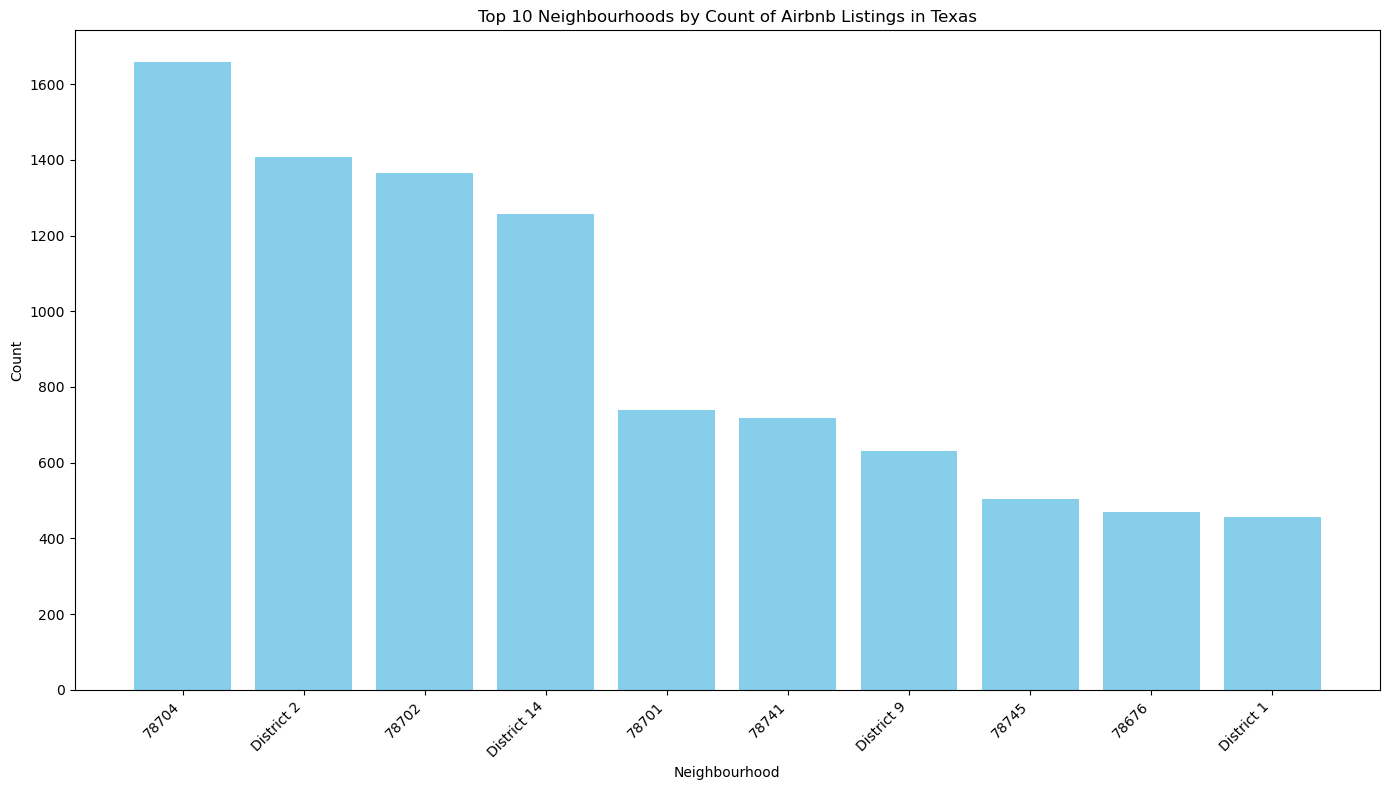

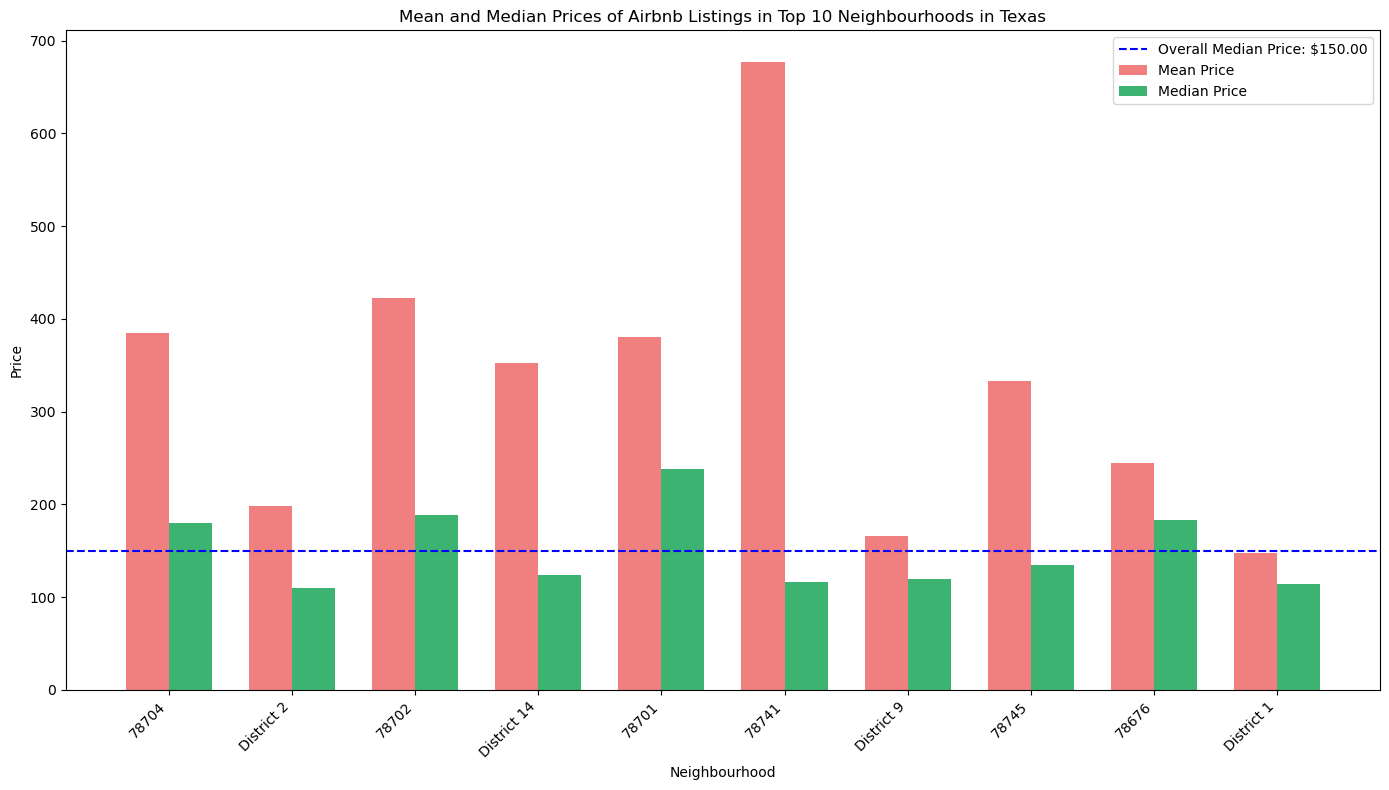

In [24]:
# Calculate the count of listings per neighborhood
neighbourhood_counts = texas['neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood', 'count']

# Select the top 10 neighborhoods by count
top_10_neighbourhoods = neighbourhood_counts.head(10)

# Filter the original DataFrame to include only the top 10 neighborhoods
top_10_data = texas[texas['neighbourhood'].isin(top_10_neighbourhoods['neighbourhood'])]

# Group by neighborhood and calculate mean and median prices
top_10_prices = top_10_data.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()

# Sort the mean and median prices DataFrame to match the order of the top 10 neighborhoods by count
top_10_prices = top_10_prices.set_index('neighbourhood').loc[top_10_neighbourhoods['neighbourhood']].reset_index()

# Calculate the overall median price for the top 10 neighborhoods
overall_median_price = top_10_data['price'].median()

# Create the first plot for the top 10 neighborhoods by count
plt.figure(figsize=(14, 8))
plt.bar(top_10_neighbourhoods['neighbourhood'], top_10_neighbourhoods['count'], color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods by Count of Airbnb Listings in Texas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create the second plot for the mean and median prices of the top 10 neighborhoods
x = np.arange(len(top_10_prices['neighbourhood']))
width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, top_10_prices['mean'], width, label='Mean Price', color='lightcoral')
plt.bar(x + width/2, top_10_prices['median'], width, label='Median Price', color='mediumseagreen')

# Add a horizontal line for the overall median price
plt.axhline(y=overall_median_price, color='blue', linestyle='--', linewidth=1.5, label=f'Overall Median Price: ${overall_median_price:.2f}')

# Add labels, title, and legend
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings in Top 10 Neighbourhoods in Texas')
plt.xticks(ticks=x, labels=top_10_prices['neighbourhood'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

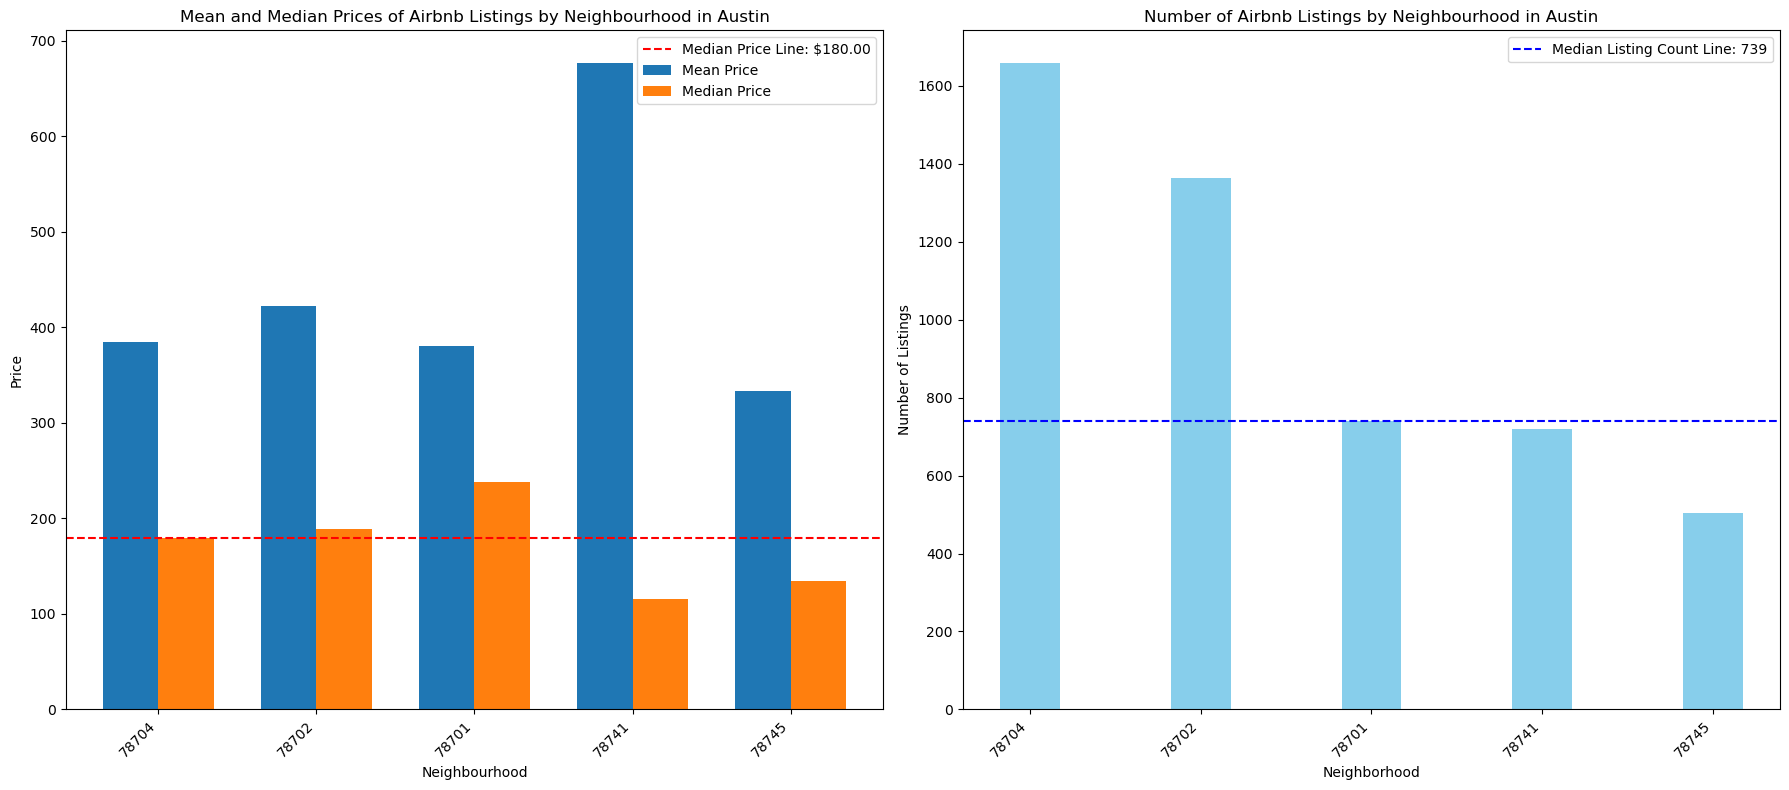

In [33]:
# Filter for Austin
austin_data = texas[texas['city'] == 'Austin']

# Group by neighborhood and calculate mean, median, and count of prices
austin_neighborhoods = austin_data.groupby('neighbourhood')['price'].agg(['mean', 'median', 'count']).reset_index()

# Get the top 5 neighborhoods by number of listings
top_5_neighborhoods = austin_neighborhoods.nlargest(5, 'count')

# Define the positions for the bars
x = np.arange(len(top_5_neighborhoods['neighbourhood']))
width = 0.35

# Create the plots
plt.figure(figsize=(18, 8))

# Plot mean and median prices
plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, top_5_neighborhoods['mean'], width, label='Mean Price')
bars2 = plt.bar(x + width/2, top_5_neighborhoods['median'], width, label='Median Price')

# Highlight the median price with a horizontal line
median_price_value = top_5_neighborhoods['median'].median()
plt.axhline(median_price_value, color='red', linestyle='--', label=f'Median Price Line: ${median_price_value:.2f}')

plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings by Neighbourhood in Austin')
plt.xticks(ticks=x, labels=top_5_neighborhoods['neighbourhood'], rotation=45, ha='right')
plt.legend()

# Plot count of listings
plt.subplot(1, 2, 2)
plt.bar(x, top_5_neighborhoods['count'], width, color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings by Neighbourhood in Austin')
plt.xticks(ticks=x, labels=top_5_neighborhoods['neighbourhood'], rotation=45, ha='right')

# Add a horizontal line for the median number of listings
plt.axhline(median_listing_count, color='blue', linestyle='--', label=f'Median Listing Count Line: {median_listing_count:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

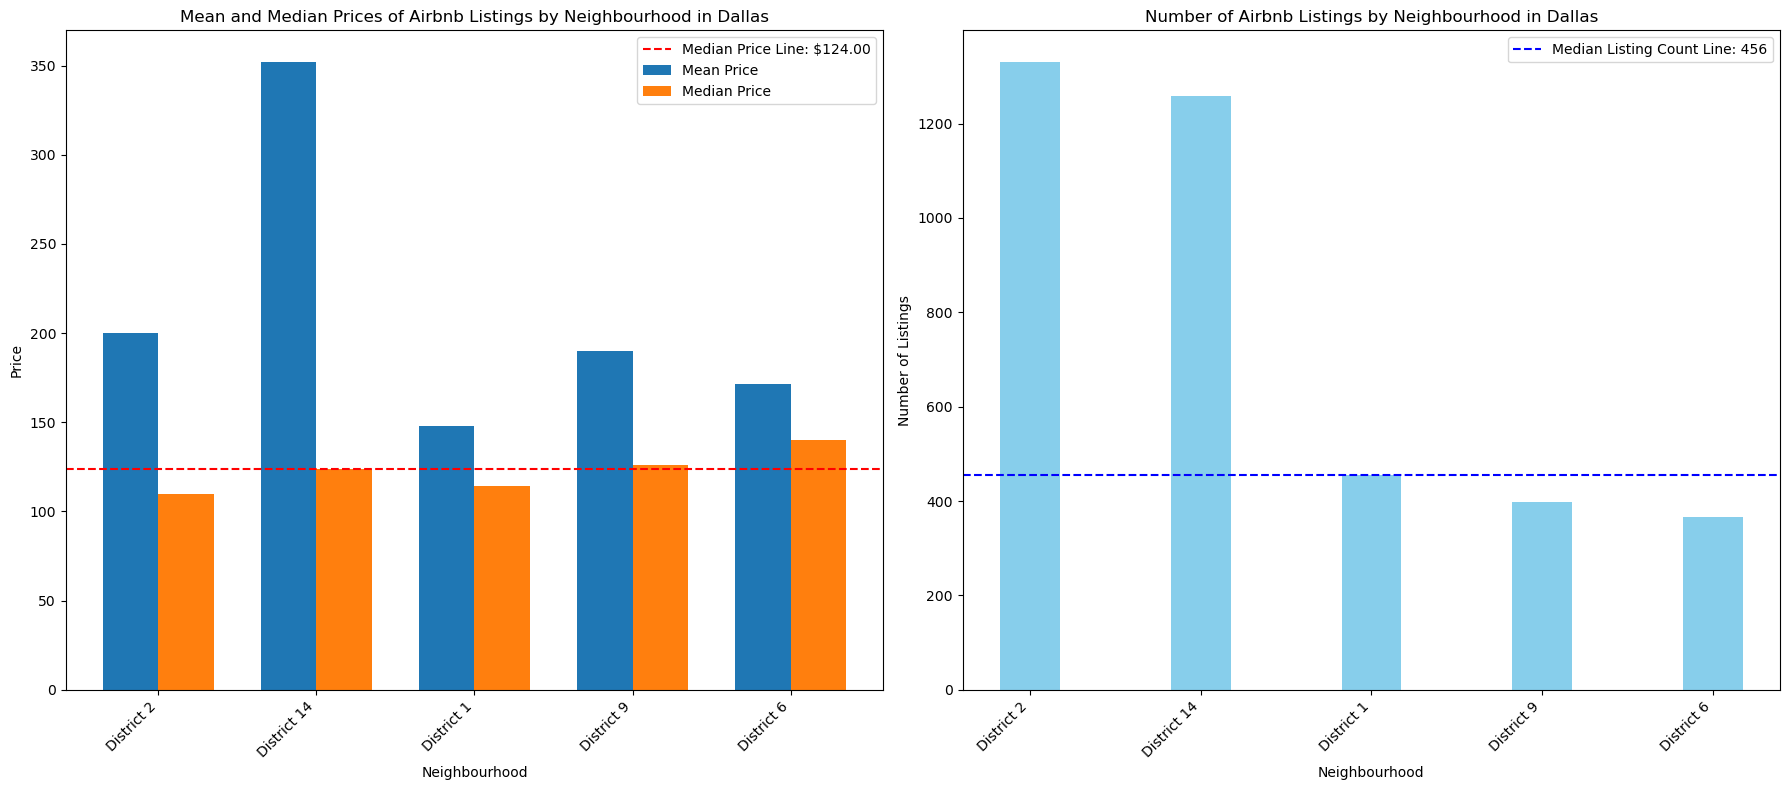

In [32]:
# Filter for Dallas
dallas_data = texas[texas['city'] == 'Dallas']

# Group by neighbourhood and calculate mean, median, and count of prices
dallas_neighbourhoods = dallas_data.groupby('neighbourhood')['price'].agg(['mean', 'median', 'count']).reset_index()

# Get the top 5 neighbourhoods by number of listings
top_5_neighbourhoods_dallas = dallas_neighbourhoods.nlargest(5, 'count')

# Define the positions for the bars
x = np.arange(len(top_5_neighbourhoods_dallas['neighbourhood']))
width = 0.35

# Create the plots
plt.figure(figsize=(18, 8))

# Plot mean and median prices
plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, top_5_neighbourhoods_dallas['mean'], width, label='Mean Price')
bars2 = plt.bar(x + width/2, top_5_neighbourhoods_dallas['median'], width, label='Median Price')

# Highlight the median price with a horizontal line
median_price_value_dallas = top_5_neighbourhoods_dallas['median'].median()
plt.axhline(median_price_value_dallas, color='red', linestyle='--', label=f'Median Price Line: ${median_price_value_dallas:.2f}')

plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings by Neighbourhood in Dallas')
plt.xticks(ticks=x, labels=top_5_neighbourhoods_dallas['neighbourhood'], rotation=45, ha='right')
plt.legend()

# Plot count of listings
plt.subplot(1, 2, 2)
plt.bar(x, top_5_neighbourhoods_dallas['count'], width, color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings by Neighbourhood in Dallas')
plt.xticks(ticks=x, labels=top_5_neighbourhoods_dallas['neighbourhood'], rotation=45, ha='right')

# Add a horizontal line for the median number of listings
plt.axhline(median_listing_count_dallas, color='blue', linestyle='--', label=f'Median Listing Count Line: {median_listing_count_dallas:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

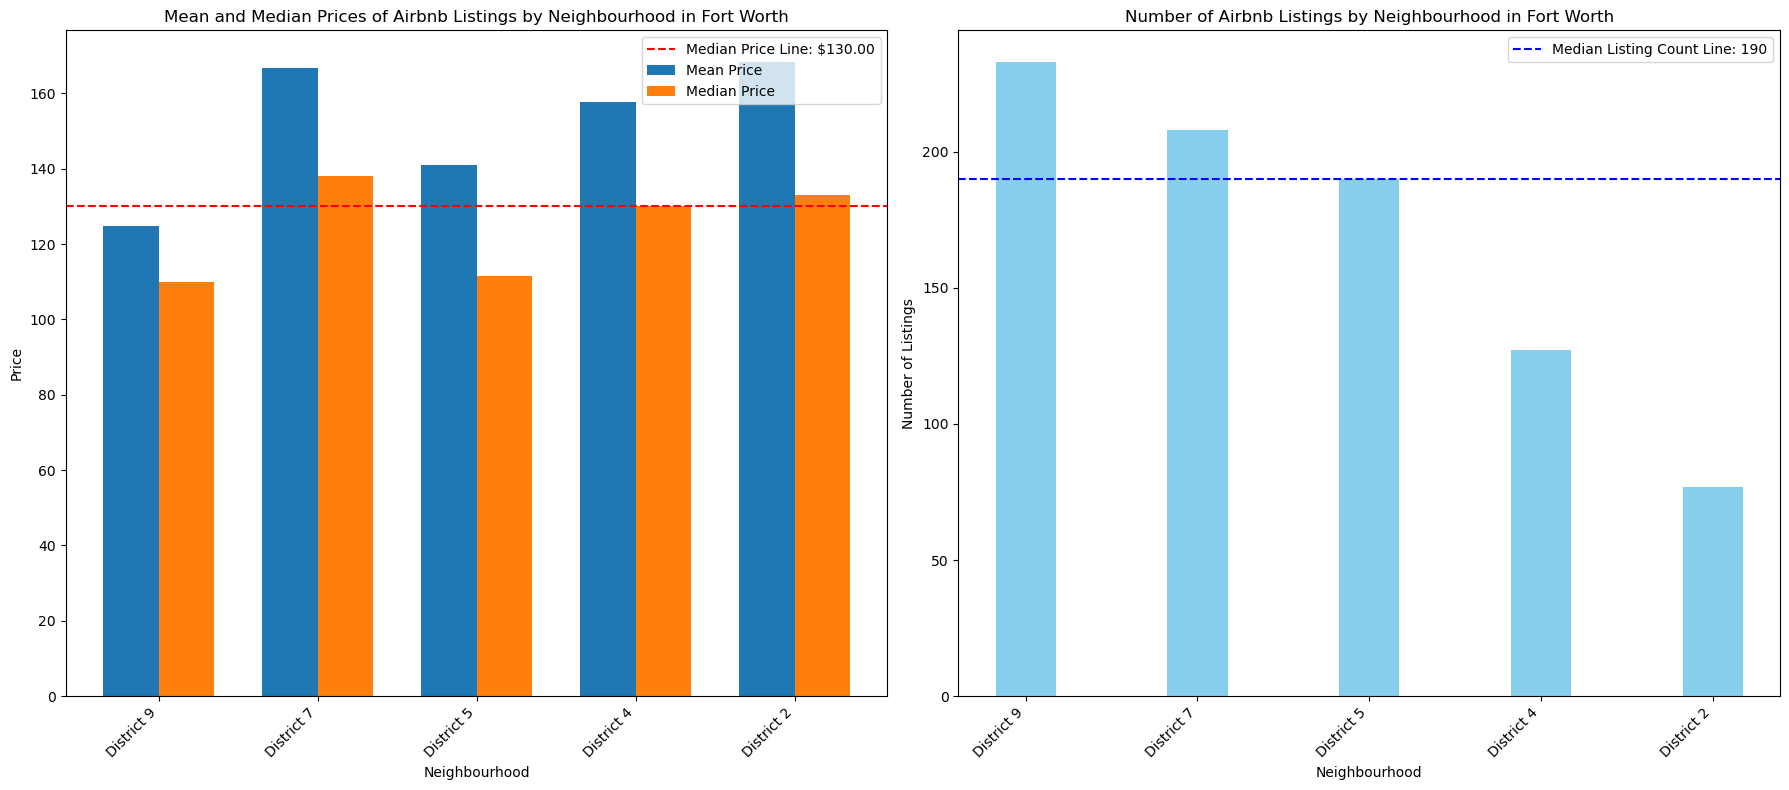

In [37]:
# Filter for Fort Worth
fort_worth_data = texas[texas['city'] == 'Fort Worth']

# Group by neighbourhood and calculate mean, median, and count of prices
fort_worth_neighbourhoods = fort_worth_data.groupby('neighbourhood')['price'].agg(['mean', 'median', 'count']).reset_index()

# Get the top 5 neighbourhoods by number of listings
top_5_neighbourhoods_fort_worth = fort_worth_neighbourhoods.nlargest(5, 'count')

# Define the positions for the bars
x = np.arange(len(top_5_neighbourhoods_fort_worth['neighbourhood']))
width = 0.35

# Create the plots
plt.figure(figsize=(18, 8))

# Plot mean and median prices
plt.subplot(1, 2, 1)
bars1 = plt.bar(x - width/2, top_5_neighbourhoods_fort_worth['mean'], width, label='Mean Price')
bars2 = plt.bar(x + width/2, top_5_neighbourhoods_fort_worth['median'], width, label='Median Price')

# Highlight the median price with a horizontal line
median_price_value_fort_worth = top_5_neighbourhoods_fort_worth['median'].median()
plt.axhline(median_price_value_fort_worth, color='red', linestyle='--', label=f'Median Price Line: ${median_price_value_fort_worth:.2f}')


plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices of Airbnb Listings by Neighbourhood in Fort Worth')
plt.xticks(ticks=x, labels=top_5_neighbourhoods_fort_worth['neighbourhood'], rotation=45, ha='right')
plt.legend()

# Plot count of listings
plt.subplot(1, 2, 2)
plt.bar(x, top_5_neighbourhoods_fort_worth['count'], width, color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings by Neighbourhood in Fort Worth')
plt.xticks(ticks=x, labels=top_5_neighbourhoods_fort_worth['neighbourhood'], rotation=45, ha='right')

# Highlight the median listing count with a horizontal line
median_listing_count_fort_worth = top_5_neighbourhoods_fort_worth['count'].median()

# Add a horizontal line for the median number of listings
plt.axhline(median_listing_count_fort_worth, color='blue', linestyle='--', label=f'Median Listing Count Line: {median_listing_count_fort_worth:.0f}')
plt.legend()

plt.tight_layout()
plt.show()

## Predictive Modeling

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Get subset of just for the state of texas
df_texas = df[df['state'] == 'TX']

# Features and target variable
features = ['name','neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 
            'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
            'availability_365', 'number_of_reviews_ltm', 'state', 'city']
target = 'price'

X = df_texas[features]
y = df_texas[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#Feature Engineering

# Define the preprocessing for numerical and categorical features
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                      'number_of_reviews_ltm']
categorical_features = ['neighbourhood', 'room_type', 'state', 'city']

# Preprocessing pipelines for both numeric and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define a simpler model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'number_of_reviews_ltm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighbourhood', 'room_type',
                                                   'state', 'city'])])),
                ('regressor', LinearRegression())])

In [55]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 383.73892474060494
Mean Squared Error: 1034748.3827321323
R^2 Score: 0.19084753530809406
